In [38]:
import re
import requests                
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_html("https://en.wikipedia.org/wiki/List_of_presidents_of_the_United_States", header=0)[1]

def get_names(args):
    '''Helper function to get nice names'''
    names = []
    namepattern = re.compile(r'^[A-Za-z]+\s[A-Za-z.\]\s[A-Z]+[a-z]+')
    for n in args:
        if namepattern.match(n):
            names.append(namepattern.match(n).group(0))
    return names

new_frame = df

def clean_data(dframe):
    dframe.rename(columns={'Presidency[a]': 'Terms',
                            'Presidency[a].1': 'Years of Presidency',
                            'President.1': 'Name',
                            'Party[b].1': 'Party',
                            'Vice President': 'Vice President'                       
                           }, inplace=True)
    dframe.drop(78, inplace=True)
    return dframe

clean_data(new_frame)
new_frame

    

KeyError: "['78'] not found in axis"

In [238]:
# How many presidents are on the page
print(f"How many presidents on the page : {len(set(df['Presidency[a]']))}")

How many presidents on the page : 45


In [239]:

# Which presidents were assasinated
assassination_pattern = re.compile(r'''Assassinated''')
assassinated = []
for index in range(len(df['Presidency[a].1'])):
    if df['Presidency[a].1'][index]:
        if assassination_pattern.search(df['Presidency[a].1'][index]):
            assassinated.append(df['President.1'][index])
print(get_names(list(set(assassinated))))



['William McKinley', 'James A. Garfield', 'John F. Kennedy', 'Abraham Lincoln']


In [240]:
# Presidents selected after serving as vice presidents
vices = []
vp_pattern = re.compile(r'vice president')
for index in range(len(df['Prior office[b]'])):
    if df['Prior office[b]'][index]:
        if vp_pattern.search(df['Prior office[b]'][index]):
            vices.append(df['President.1'][index])
print(get_names(list(set(vices))))

['Andrew Johnson', 'Millard Fillmore', 'John Tyler', 'Theodore Roosevelt', 'Lyndon B. Johnson', 'Gerald Ford', 'George H. W. Bush', 'Thomas Jefferson', 'Calvin Coolidge', 'Martin Van Buren', 'Richard Nixon', 'John Adams', 'Harry S. Truman', 'Chester A. Arthur']


In [241]:
# which presidents had one VP for duration of term

In [242]:
# which president was in office for long time and when he left

In [243]:
# How many presidents with same forenames?

# lets get the first names of all presidents and remove duplicates
first_names = list(set(i.split()[0] for i in df['President.1']))

firstnames = {} # will contain the unique first names and each name has 0 president so far
for index in range(len(first_names)):
    for name in first_names:
        firstnames[name] = 0
        
# all unique names have a zero count
# print(firstnames)

for name in first_names:
    for president in df['President.1'].drop_duplicates():
        if president.startswith(name):
            firstnames[name] += 1
            continue
# print(firstnames)

# lets count how many names greater than 1
total = 0
for value in firstnames.values():
    if value > 1:
        total += 1
        continue
print(f'Total number of Presidents with similar forenames: {total}')
        

Total number of Presidents with similar forenames: 6


In [244]:
# oldest president ever elected


In [245]:
# # youngest president elected
# birthdates = []
# dates_pattern = re.compile(r'\d\d\d\d')
# for date in filter(None, dataframe['Presidents']):
#     if dates_pattern.search(date):
#         birthdates.append(dates_pattern.search(date).group(0))
# # print(birthdates)

In [246]:
# president who lived to an old age after leaving office
# question not clear so i think presidents who left office but are still alive
birthdays = []
birth_pattern = re.compile(r'Born\s\d\d\d\d')
for birth in filter(None, df['President.1']):
    if birth_pattern.search(birth):
        birthdays.append(birth)

data = {}
age_pattern = re.compile(r'''(\d\d years old)''')
for num, name in enumerate(birthdays):
    if age_pattern.search(name):
        data.update({name: age_pattern.search(name).group(0).split()[0]})
        
# now print the president with the highest age and still living
print(f'''The president who lived to an old age after leaving office is: {max(data)}''')

The president who lived to an old age after leaving office is: Jimmy CarterBorn 1924(95 years old)[114][115][116]


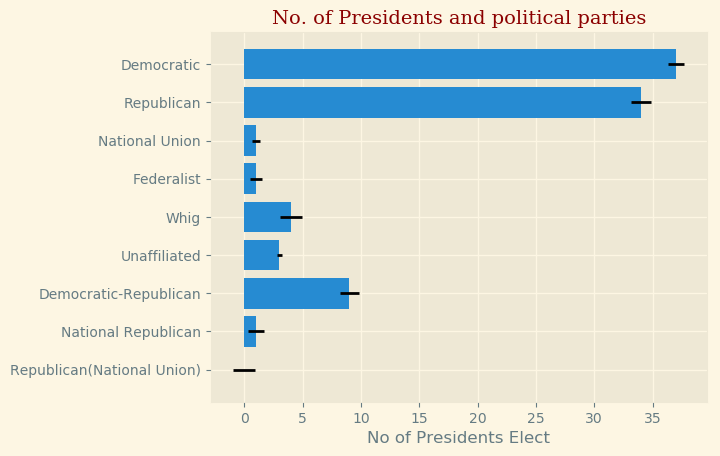

In [247]:
# Graph that shows no. of presidents and their respective political parties and party with many presidents
parties = {"Democratic":0 , "Republican":0, "National Union":0,
           "Federalist":0, "Whig":0, "Unaffiliated":0,
           "Democratic-Republican":0, "National Republican":0,
           "Republican(National Union)":0}

for key,value in parties.items():
    for party in filter(None, df['Party[c].1']):
        if re.match(key, party):
            parties[key] += 1
        continue
        
# print(parties)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }


plt.rcdefaults()
with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots()
    y_pos = np.arange(len(parties))
    presidents = 3 + 10 * np.random.rand(len(parties))
    error = np.random.rand(len(parties))
    ax.barh(*zip(*parties.items()), xerr=error, align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(parties)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('No of Presidents Elect')
    ax.set_title('No. of Presidents and political parties', fontdict=font) 
plt.show()
    

In [248]:
# From the graph the party with many presidents elect is the Democratic party